Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [8]:
import os
import requests
import pandas as pd
import json

csv_file_path = r'C:\Users\User\Desktop\Lighthouse BootCamp\Statistical-Modelling-Project\yelp_parks_df.csv'
# Load the CSV file into a DataFrame
yelp_parks_df = pd.read_csv(csv_file_path, index_col='Unnamed: 0')

csv_file_path = r'C:\Users\User\Desktop\Lighthouse BootCamp\Statistical-Modelling-Project\foursquare_parks_df.csv'
# Load the CSV file into a DataFrame
foursquare_parks_df = pd.read_csv(csv_file_path, index_col='Unnamed: 0')

csv_file_path = r'C:\Users\User\Desktop\Lighthouse BootCamp\Statistical-Modelling-Project\bikes_df.csv'
# Load the CSV file into a DataFrame
bikes_df = pd.read_csv(csv_file_path, index_col='Unnamed: 0')

csv_file_path = r'C:\Users\User\Desktop\Lighthouse BootCamp\Statistical-Modelling-Project\venue_df1.csv'
# Load the CSV file into a DataFrame
venue_df1 = pd.read_csv(csv_file_path, index_col='Unnamed: 0')

# Merge the venue_df (combination of Foursquare and Yelp Parks data) with bikes station data
merged_df = bikes_df.merge(venue_df1, on=['lat','lon'])
merged_df.head(5)

merged_df.to_csv('merged_df.csv')

,id,name,lat,lon,bikes,fs_parks,yelp_parks
0,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,8,29,10
1,4ff88d5880e71aa40d34cfe5d09b0ca7,Primrose Ave / Davenport Rd,43.671420,-79.445947,7,28,3
2,a09c67c0b419654d907c9134b108e328,Queen St. E / Rhodes Ave.,43.666224,-79.317693,4,28,10
3,d6a9daee68070a8b106cfb598d81308c,Bond St / Queen St E,43.653236,-79.376716,17,50,43
4,8f8af40d9388c8a3962559e8681d3db7,Church St / Alexander St,43.663722,-79.380288,7,50,39


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

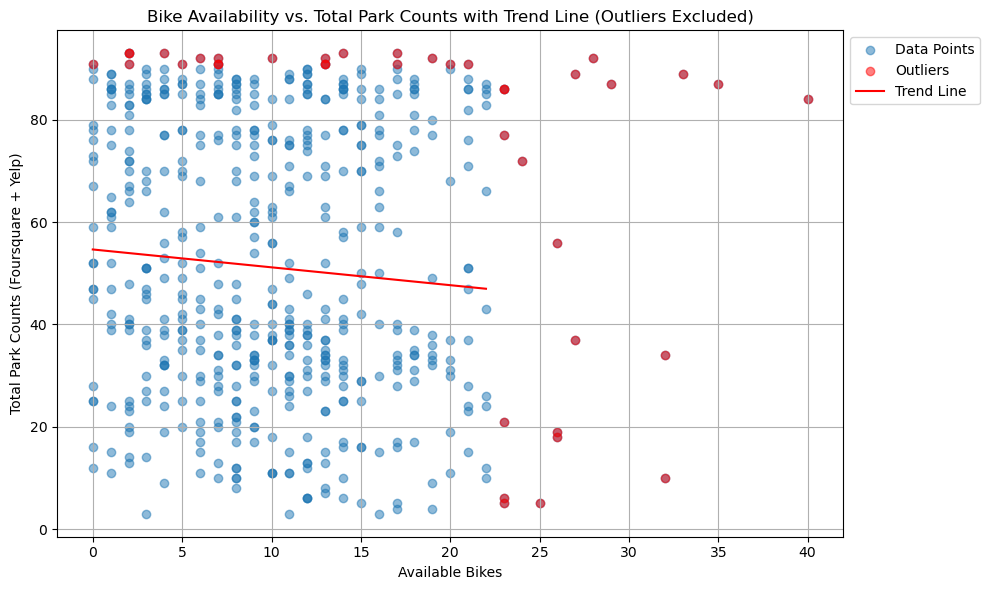

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Set a threshold for outliers
bikes_threshold = merged_df['bikes'].quantile(0.95)
total_parks_threshold = (merged_df['fs_parks'] + merged_df['yelp_parks']).quantile(0.95)

# Filter data to exclude outliers from trend line calculation
filtered_for_trend_df = merged_df[(merged_df['bikes'] <= bikes_threshold) & 
                                  ((merged_df['fs_parks'] + merged_df['yelp_parks']) <= total_parks_threshold)]

# Create a scatter plot of bike availability vs total park counts (Foursquare + Yelp)
plt.scatter(merged_df['bikes'], merged_df['fs_parks'] + merged_df['yelp_parks'], label='Data Points', alpha=0.5)

# Show the outlier points in a different color
outliers_df = merged_df[(merged_df['bikes'] > bikes_threshold) | 
                        ((merged_df['fs_parks'] + merged_df['yelp_parks']) > total_parks_threshold)]
plt.scatter(outliers_df['bikes'], outliers_df['fs_parks'] + outliers_df['yelp_parks'], label='Outliers', color='red', alpha=0.5)

# Calculate and plot the trend line using numpy (excluding outliers)
trend_x = np.linspace(min(filtered_for_trend_df['bikes']), max(filtered_for_trend_df['bikes']), 100)
trend_y = np.polyval(np.polyfit(filtered_for_trend_df['bikes'], 
                                filtered_for_trend_df['fs_parks'] + filtered_for_trend_df['yelp_parks'], 1), trend_x)
plt.plot(trend_x, trend_y, color='red', label='Trend Line')

plt.xlabel('Available Bikes')
plt.ylabel('Total Park Counts (Foursquare + Yelp)')
plt.title('Bike Availability vs. Total Park Counts with Trend Line (Outliers Excluded)')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


The initial pattern/relationship based on the scatter plot and trend line suggests a potential negative correlation between bike availability and the total park counts (Foursquare + Yelp) for the bike stations.

Scatter Plot Distribution: The scatter plot shows that as the number of available bikes increases (moving from left to right on the x-axis), there seems to be a trend of decreasing total park counts (moving from top to bottom on the y-axis).

Trend Line Direction: The red trend line is fitted to the data points and has a negative slope. This means that, on average, as the bike availability increases, the combined total park counts tend to decrease.

Outliers: Some data points are marked as outliers, indicating stations with extreme values of bike availability or total park counts that might deviate from the general trend.

While this initial pattern suggests a negative correlation, it's important to perform statistical analysis to confirm the strength and significance of this relationship. The visual interpretation is a starting point, and further exploration is needed to understand any potential causal factors or additional variables that might influence this relationship.

However, it's important to note that correlation doesn't imply causation, and further analysis would be needed to determine the underlying factors influencing this relationship.

Overall, this initial scatter plot helped identify a potential connection between bike availability and park counts, prompting further investigation into the relationship and potential insights.

In [ ]:
#MAP Visualization 

import folium

# Create a map centered around the mean latitude and longitude
map_center = [merged_df['lat'].mean(), merged_df['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for bike stations
for index, row in merged_df.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['name']).add_to(m)

# Add markers for Foursquare parks in blue
for index, row in merged_df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']], radius=5, color='blue', fill=True,
                        fill_color='blue', fill_opacity=0.5,
                        popup=f'Foursquare Parks: {row["fs_parks"]}').add_to(m)

# Add markers for Yelp parks in green (slightly adjusted latitude and longitude)
for index, row in merged_df.iterrows():
    folium.CircleMarker([row['lat'] + 0.002, row['lon'] + 0.002], radius=5, color='green', fill=True,
                        fill_color='green', fill_opacity=0.5,
                        popup=f'Yelp Parks: {row["yelp_parks"]}').add_to(m)

m.save('map.html')

#This an interactive map that visually represents the locations of bike stations, Foursquare parks, and Yelp parks. 
#The map allows users to interactively explore the distribution of these locations and their counts across the city.

In [ ]:
# Heatmap

import folium
from folium.plugins import HeatMap

# Create a map centered around the mean latitude and longitude
map_center = [merged_df['lat'].mean(), merged_df['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Create a HeatMap layer using the latitude and longitude data
heat_data = [[row['lat'], row['lon']] for index, row in merged_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m.save('bike_stations_heatmap.html')


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
import sqlite3

# Connect to the SQLite database (or create a new one if it doesn't exist)
conn = sqlite3.connect('Toronto_bike_data.db')

#Create a cursor object to interact with the database
cursor = conn.cursor()

#Define the table schema and create the table in the database
create_table_query = '''
CREATE TABLE IF NOT EXISTS bike_data (
    id TEXT PRIMARY KEY,
    name TEXT,
    lat REAL,
    lon REAL,
    bikes INTEGER,
    fs_parks INTEGER,
    yelp_parks INTEGER
);
'''
cursor.execute(create_table_query)

for index, row in merged_df.iterrows():
    insert_query = '''
    INSERT INTO bike_data (id, name, lat, lon, bikes, fs_parks, yelp_parks)
    VALUES (?, ?, ?, ?, ?, ?, ?);
    '''
    values = (
        row['id'],
        row['name'],
        row['lat'],
        row['lon'],
        row['bikes'],
        row['fs_parks'],
        row['yelp_parks']
    )
    cursor.execute(insert_query, values)
    
conn.commit()
conn.close()

Look at the data before and after the join to validate your data.

In [9]:
print("Before Join - Bikes DataFrame:")
print(bikes_df.head(5))

print("\nBefore Join - Foursquare Parks DataFrame:")
print(foursquare_parks_df.head(5))

print("\nBefore Join - Yelp Parks DataFrame:")
print(yelp_parks_df.head(5))


Before Join - Bikes DataFrame:
                                 id                         name        lat  \
0  fb337bbed72e2be090071e199899b2be    Queen St E / Woodward Ave  43.665269   
1  4ff88d5880e71aa40d34cfe5d09b0ca7  Primrose Ave / Davenport Rd  43.671420   
2  a09c67c0b419654d907c9134b108e328    Queen St. E / Rhodes Ave.  43.666224   
3  d6a9daee68070a8b106cfb598d81308c         Bond St / Queen St E  43.653236   
4  8f8af40d9388c8a3962559e8681d3db7     Church St / Alexander St  43.663722   

         lon  bikes  
0 -79.319796      8  
1 -79.445947      7  
2 -79.317693      4  
3 -79.376716     17  
4 -79.380288      7  

Before Join - Foursquare Parks DataFrame:
         lat        lon  fs_parks
0  43.665269 -79.319796        29
1  43.671420 -79.445947        28
2  43.666224 -79.317693        28
3  43.653236 -79.376716        50
4  43.663722 -79.380288        50

Before Join - Yelp Parks DataFrame:
         lat        lon  yelp_parks
0  43.665269 -79.319796          10
1  43.

In [10]:
print("\nAfter Join - Merged DataFrame:")
print(merged_df.head(5))


After Join - Merged DataFrame:
                                 id                         name        lat  \
0  fb337bbed72e2be090071e199899b2be    Queen St E / Woodward Ave  43.665269   
1  4ff88d5880e71aa40d34cfe5d09b0ca7  Primrose Ave / Davenport Rd  43.671420   
2  a09c67c0b419654d907c9134b108e328    Queen St. E / Rhodes Ave.  43.666224   
3  d6a9daee68070a8b106cfb598d81308c         Bond St / Queen St E  43.653236   
4  8f8af40d9388c8a3962559e8681d3db7     Church St / Alexander St  43.663722   

         lon  bikes  fs_parks  yelp_parks  
0 -79.319796      8        29          10  
1 -79.445947      7        28           3  
2 -79.317693      4        28          10  
3 -79.376716     17        50          43  
4 -79.380288      7        50          39  
